# Capital Asset Pricing Model (CAPM)



Given 2 assets, we can create any number of different portfolios

In [1]:
# import all libraries we'll need
import pandas as pd # For datasets
import matplotlib.pyplot as pl # For plots
import numpy as np # For numerical operations like algorithm

# Tell the application to show plots within webpage
%matplotlib inline

# Display only two decimals to avoid distraction
pd.set_option('display.precision',2)

In [3]:
# Reada data from csv files for each stock and show a data sample
data_location = '../Data/'

# Define stocks for study
names = ['Microsoft', 'Walmart']
tickers = ['MSFT', 'WMT']

# Load pricing data from the selected stacks, each from one .csv file
for i in range(len(tickers)):
    ticker_ = tickers[i].replace('^','_')
    df_tmp = pd.read_csv(data_location + ticker_ + '_Mkt_Data.csv')[['date','Adjclose']].set_index('date')
    df_tmp.columns = [names[i]]
    if i == 0:
        new_df = df_tmp.copy()
    else:
        new_df = new_df.join(df_tmp, how='outer')

# We store only the Adjusted Close Price and we align all time series
#new_df = new_df.set_index(new_df.date)
#new_df = new_df.drop('date',axis=1)

# Show a sample of the data
print ('Data sample')
print (new_df.head())
new_df.plot(subplots = True, layout = (2,2), figsize = (16,12), grid = True, rot = 85);

FileNotFoundError: [Errno 2] No such file or directory: '../Data/MSFT_Mkt_Data.csv'

In [37]:
returns = new_df.pct_change()
returns

,Microsoft,Walmart
date,,
2010-01-04,NaN,NaN
2010-01-05,3.23e-04,-9.96e-03
2010-01-06,-6.14e-03,-2.24e-03
2010-01-07,-1.04e-02,5.60e-04
2010-01-08,6.90e-03,-5.04e-03
...,...,...
2023-04-27,3.20e-02,3.11e-03
2023-04-28,7.97e-03,-2.71e-03
2023-05-01,-5.53e-03,4.11e-03


In [38]:
# A portfolio is just a vector of weights,for instance 50% Walmart, 50% Microsoft

weights = np.array([x / 20.0 for x in range(21)])

#print weights
portfolio = np.matrix(np.array([weights , 1-weights]))
portfolio = portfolio.transpose()
print(portfolio)
print(np.shape(portfolio))

[[0.   1.  ]
 [0.05 0.95]
 [0.1  0.9 ]
 [0.15 0.85]
 [0.2  0.8 ]
 [0.25 0.75]
 [0.3  0.7 ]
 [0.35 0.65]
 [0.4  0.6 ]
 [0.45 0.55]
 [0.5  0.5 ]
 [0.55 0.45]
 [0.6  0.4 ]
 [0.65 0.35]
 [0.7  0.3 ]
 [0.75 0.25]
 [0.8  0.2 ]
 [0.85 0.15]
 [0.9  0.1 ]
 [0.95 0.05]
 [1.   0.  ]]
(21, 2)


Expected Returns [[Microsoft, Walmart]]: [[11.59596604  1.88386894]]

Covarianc Matrix 
[[0.11612913 0.02975965]
 [0.02975965 0.06554779]]

Correlation Matrix 
[[1.         0.34109728]
 [0.34109728 1.        ]]

Expected returns of 21 portfolios: [[ 1.88386894  2.36947379  2.85507865  3.3406835   3.82628836  4.31189321
   4.79749807  5.28310292  5.76870778  6.25431263  6.73991749  7.22552234
   7.7111272   8.19673205  8.68233691  9.16794176  9.65354662 10.13915147
  10.62475633 11.11036118 11.59596604]]

Risk of 21 portfolios [[25.60230355 24.95483415 24.41551615 23.99164419 23.68941607 23.51352286
  23.46680552 23.55003284 23.76183942 24.09883522 24.55586664 25.12638444
  25.80286193 26.57720929 27.44114254 28.38648332 29.40538127 30.49046311
  31.63491922 32.8325413  34.07772445]]



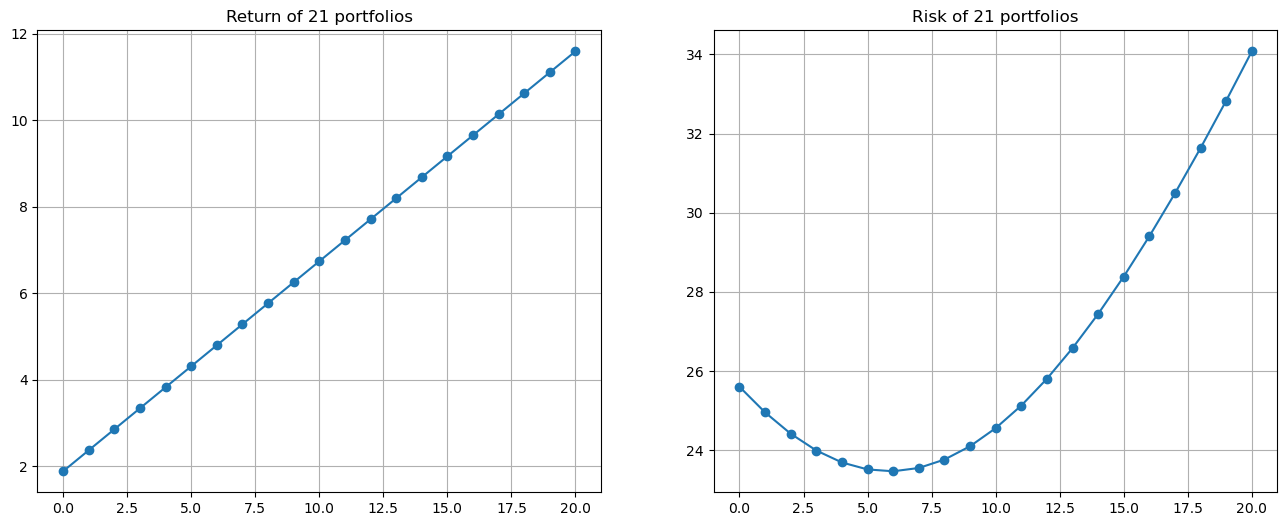

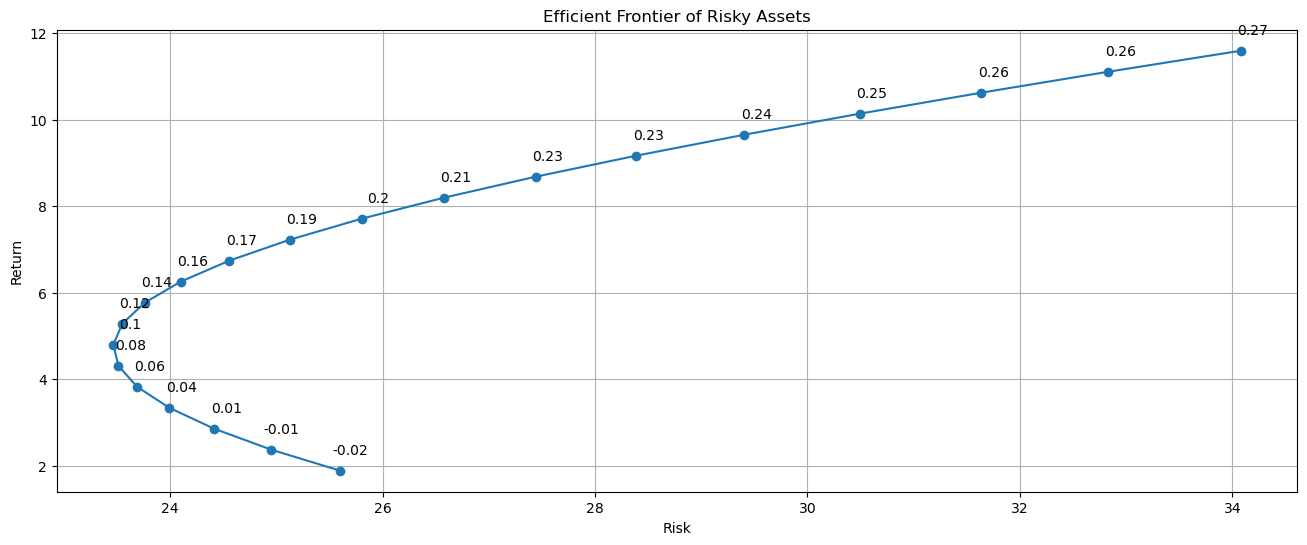

In [39]:
# We need the portfolio returns
risk_free_rate = 2.5
# Calculate the expected returns for Microsoft and Walmart using last year of daily returns (250 days)
r = np.matrix([returns.iloc[-250:].Microsoft.sum() * 100, returns.iloc[-250:].Walmart.sum() * 100])
print('Expected Returns [[Microsoft, Walmart]]: %s' %r)
print()

# Calculate covariance matgrix between Walmart and Microsoft
V = np.cov(returns.iloc[-250:].Microsoft, returns.iloc[-250:].Walmart) * 250
print('Covarianc Matrix \n%s\n' %V)

#Calculate correlation matrix between Walmart and Microfost
rho = np.corrcoef(returns.iloc[-250:].Microsoft, returns.iloc[-250:].Walmart)
print('Correlation Matrix \n%s\n' %rho)

# Initialize Plots
fig = pl.figure(figsize = (16,6))
ax1 = pl.subplot(121)
ax2 = pl.subplot(122)

# Step 1: Calculate the returns of 21 portfolios
port_ret = portfolio * r.T
print('Expected returns of 21 portfolios: %s' % port_ret.T)
print()
ax1.plot(port_ret,'-o')
ax1.grid()
ax1.set_title('Return of 21 portfolios')

#------------------------------------------------------

# Step 2 Calculate the risk of 21 portfolios
port_sigma = portfolio[:,0]*0
for i in range(len(portfolio)):
    port_sigma[i] = 100*np.sqrt(portfolio[i,:] * V * portfolio[i,:].transpose())
    
print('Risk of 21 portfolios %s' % port_sigma.T)
print()

portfolios_sharpe_ratios = np.round((port_ret - risk_free_rate) / port_sigma,2)

ax2.plot(port_sigma,'-o')
ax2.grid()
ax2.set_title('Risk of 21 portfolios')

#Plot Efficient Frontier
pl.figure(figsize = (16,6))
pl.plot(port_sigma, port_ret,'-o')
pl.grid()
pl.title('Efficient Frontier of Risky Assets')
pl.xlabel('Risk')
pl.ylabel('Return')
for label,x,y in zip(portfolios_sharpe_ratios, port_sigma, port_ret):
    pl.annotate(float(label), xy = (x,y), xytext = (20,20), textcoords = 'offset points', ha='right', va='top')

In [33]:
print(portfolios_sharpe_ratios.T)

[[-0.02 -0.01  0.01  0.04  0.06  0.08  0.1   0.12  0.14  0.16  0.17  0.19
   0.2   0.21  0.23  0.23  0.24  0.25  0.26  0.26  0.27]]


Text(0, 0.5, 'Return')

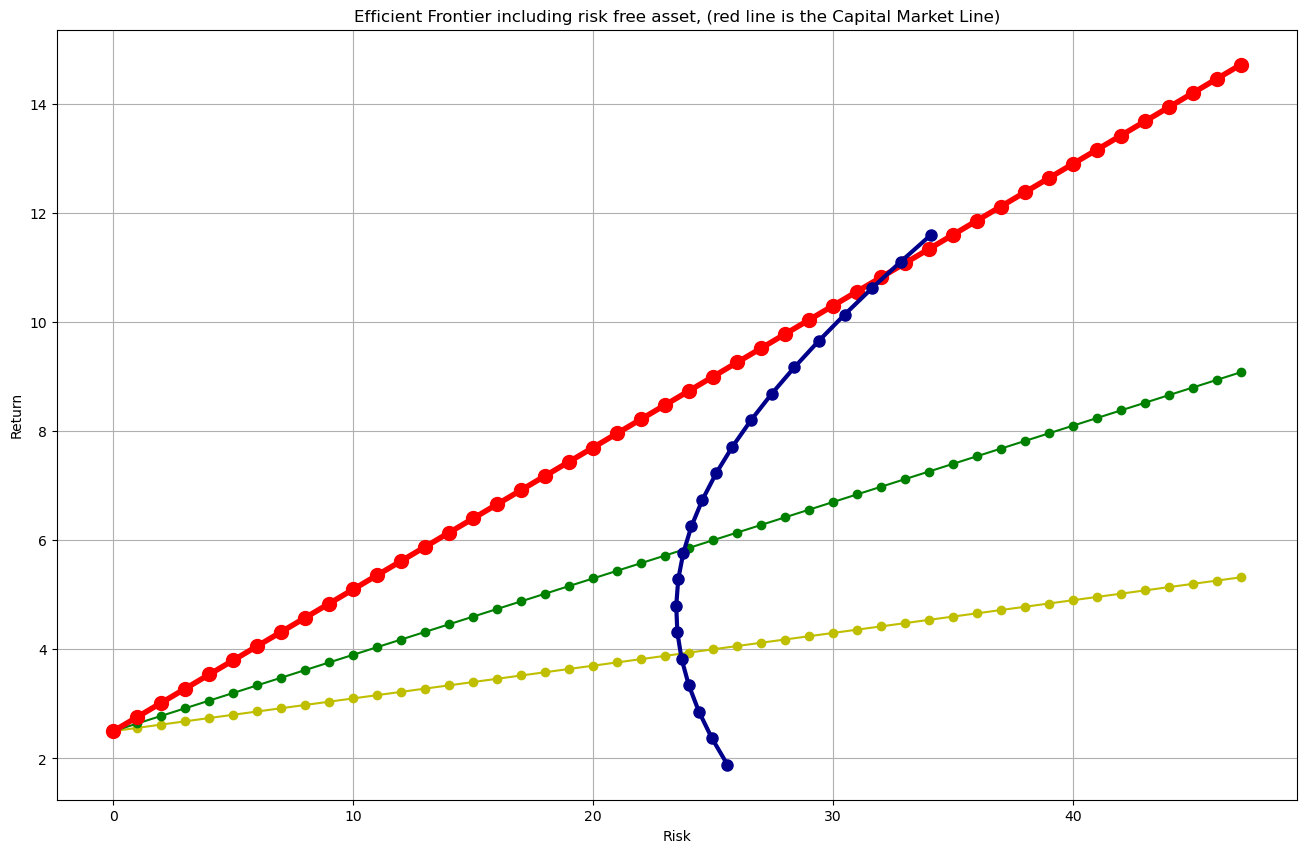

In [34]:
x2 = np.matrix(range(48))

y1 = np.multiply(x2, portfolios_sharpe_ratios[4]) + risk_free_rate
y2 = np.multiply(x2, portfolios_sharpe_ratios[8]) + risk_free_rate
y7 = np.multiply(x2, portfolios_sharpe_ratios[19]) + risk_free_rate

# Plot Efficient Frontier
pl.figure(figsize = (16,10))
pl.plot(x2.T, y1.T, 'o', linestyle = '-', color = 'y')
pl.plot(x2.T, y2.T, 'o', linestyle = '-', color = 'g')
pl.plot(x2.T, y7.T, 'o', linestyle = '-', color = 'r', linewidth = 4, markersize = 10)

pl.plot(port_sigma, port_ret, 'o', linestyle = '-', color = 'DarkBlue', linewidth = 3, markersize = 8)
pl.grid()
pl.title('Efficient Frontier including risk free asset, (red line is the Capital Market Line)')
pl.xlabel('Risk')
pl.ylabel('Return')


Question: How do we determine the percentage we should invest in the risk free rate and what percentage in the risky portfolio?

Once we have estabished the Market Capital Line, we can use this line to find any point on it. So we determine the level of risk we are willing to tolerate, let's call it MaxRiskTol, then we can see wht level of Return on the MCL we can expect for this level of risk, let's call it InvestorExpectedReturn

Then we can determine the weights using the following equation:

$$ RiskyPortfolioReturn * weight + RiskFreeRate * (1 - weight) = InvestorExpectedREturn $$

Finaly we solve for weight:

$$ weight = \frac{(InvestorExpectedREturn - RiskFreeRate)}{(RiskyPortfolioReturn - RiskFreeRate)} $$


Compare with CAPM equation:

$$ r = RFR + \beta \space (RM - RFR) $$

or 

$$ (r - RFR) = \beta \space (RM -RFR) $$

Where r is the investor's portfolio expected return and RM is Market Return

Or seen in a different light:

$$ \beta = \frac{(r - RFR)}{(RM - RFR)} $$

Intriguintly, the weight that we invest in the fisky portfolio has the same value as $\beta$ of the investor's portflio/asset to the market in CAPM

For instance, if we estimate that the weight we need to allocate to the risky portfolio in order to get the investor's expected return is 1, this means that the $\beta$ of their portfolio should also be 1.

In this case, we don't need to assign any weight to the risk free asset as we can achieve the maximum sharpe ratio available in the market by holding the marked portfolio, which is within our risk tolerance constraing

$\beta$ becomes effectively the leverage imposed to the market portfolio to achieve the investor's expected rate of return. 